In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np

In [2]:
# импортируем данные из файла "task", создаем 3 дата фрейма
df_task = pd.read_excel('Task.xlsx', sheet_name = 'task',skiprows = [1])
df_call = pd.read_excel('Task.xlsx', sheet_name = 'call',skiprows = [1])
df_result_pr = pd.read_excel('Task.xlsx', sheet_name = 'result_product',skiprows = [1])

In [3]:
df_task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23119 entries, 0 to 23118
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   task_id         23119 non-null  int64         
 1   hid             23119 non-null  object        
 2   finish_dt_task  23119 non-null  datetime64[ns]
 3   base_id         23119 non-null  int64         
 4   task_result_id  23119 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 903.2+ KB


In [4]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39598 entries, 0 to 39597
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   task_id         39598 non-null  int64         
 1   call_id         39598 non-null  object        
 2   agent_name      39598 non-null  object        
 3   call_dt         39598 non-null  datetime64[ns]
 4   call_result_id  39598 non-null  int64         
 5   Unnamed: 5      39598 non-null  object        
 6   call_time_sec   39598 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.1+ MB


In [5]:
df_result_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   hid              5999 non-null   object        
 1   product_type_cd  5999 non-null   object        
 2   approve_dt       3724 non-null   datetime64[ns]
 3   reject_dt        2264 non-null   datetime64[ns]
 4   using_dt         1961 non-null   datetime64[ns]
dtypes: datetime64[ns](3), object(2)
memory usage: 234.5+ KB


In [6]:
df_result_pr

,hid,product_type_cd,approve_dt,reject_dt,using_dt
0,0004c6142b4bf98fdb51ec0fead099b0,INV,2020-05-21,NaT,NaT
1,0008ddccf50e9a72ee9c6223fb45e4c4,INV,2020-05-29,NaT,NaT
2,000a2e5621a118118f42560c9821e6a1,INV,2020-04-27,NaT,2020-04-29
3,001a43fffa79a5b60c01473eeff9fd1f,INV,NaT,2020-04-01,NaT
4,001c27126f4fd13cc4126d4906c48425,INV,2020-05-06,NaT,NaT
...,...,...,...,...,...
5994,ffd2fd672444a27d03dbe426552502d5,INV,2020-05-24,NaT,2020-05-26
5995,ffd6cb7cef830393c9364ab42013f319,INV,2020-05-07,NaT,NaT
5996,ffe59b26f8c20e68ef921abdcd3532b8,INV,NaT,2020-06-05,NaT
5997,ffef7d941cae9d2aa8416f657f41109f,INV,2020-05-12,NaT,NaT


In [7]:
# в датафрейме df_task все значения task_id уникальны
df_task.task_id.value_counts()

843083337    1
911236643    1
911229236    1
911226584    1
911223840    1
            ..
887048646    1
887039136    1
887034762    1
887033327    1
933065058    1
Name: task_id, Length: 23119, dtype: int64

In [8]:
# в дата фрейме df_call показатель  task_id неуникален
df_call.task_id.value_counts()

873713374    14
869534692    13
929387253    11
874484093    10
860081782    10
             ..
896017602     1
896018446     1
896023320     1
896027504     1
933065058     1
Name: task_id, Length: 23119, dtype: int64

In [9]:
# в датафрейме df_task все значения hid уникальны
df_task.hid.value_counts()

36d2f49fc49f572677416d54536a41c6    1
658729d4a601e2378b8ac2b08d080545    1
692c721b62f348c4384335eacd46dde8    1
b8812cea323dd50672305d5699f53b0e    1
1f801a75c036c6af1f2d567fd5ca73da    1
                                   ..
7e256d08d19b6aaac1213958c7cd6fb4    1
6e7896ea8cbc19c9f41d6056f5d09f2d    1
74d4b3a2f191fba3fdab78513acf7b11    1
712b975e07b05a58b1fcfb188bf61bfa    1
1242029bded20eb92ffa31fd749d7ee4    1
Name: hid, Length: 23119, dtype: int64

In [10]:
# т.к при импорте данных для датафрейма df_call название показателя "Название результата звонка"
# не отображается, мы его переименуем
df_call = df_call.rename(columns={"Unnamed: 5": "call_result_translation"})

# Задание 1

### Самая болшая база это df_call, к которой мы будем присоединять с помощью метода merge df_task по колонне task_id, затем объеденим словари с основной таблицей
### Так же видим, что уникальных значениий task_id в датафреймах df_call и df_task равное кол-во, поэтому применим метод inner при объединении, что бы еще раз проверить.

In [11]:
# объеденяем датафрейм df_call c df_task
df1 = df_call.merge(df_task, left_on = "task_id", right_on = "task_id",how='inner')

In [12]:
#Кол-во наблюденийне не изменилось
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39597
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   task_id                  39598 non-null  int64         
 1   call_id                  39598 non-null  object        
 2   agent_name               39598 non-null  object        
 3   call_dt                  39598 non-null  datetime64[ns]
 4   call_result_id           39598 non-null  int64         
 5   call_result_translation  39598 non-null  object        
 6   call_time_sec            39598 non-null  int64         
 7   hid                      39598 non-null  object        
 8   finish_dt_task           39598 non-null  datetime64[ns]
 9   base_id                  39598 non-null  int64         
 10  task_result_id           39598 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 3.6+ MB


In [13]:
#создаем словарь для расшифровки результатов задания
dict_task_result = {6:"Успешно", 5:"Отказ", 3:"Недозвон", 1:"Дубль", 4:"Неуспешно из-за другой заявки",
                    7:"Черный список", 2:"Не было звонка"}

#создаем новую колонку с рашифровкой
df1['task_result_translation'] = df1['task_result_id'].map(dict_task_result)

In [14]:
#создаем словарь для расшифровки баз данных
dict_base = {7553:"База 1", 3145:"База 2", 3445:"База 3", 7554:"База 4"}

#создаем новую колонку с рашифровкой
df1['base_translation'] = df1['base_id'].map(dict_base)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39597
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   task_id                  39598 non-null  int64         
 1   call_id                  39598 non-null  object        
 2   agent_name               39598 non-null  object        
 3   call_dt                  39598 non-null  datetime64[ns]
 4   call_result_id           39598 non-null  int64         
 5   call_result_translation  39598 non-null  object        
 6   call_time_sec            39598 non-null  int64         
 7   hid                      39598 non-null  object        
 8   finish_dt_task           39598 non-null  datetime64[ns]
 9   base_id                  39598 non-null  int64         
 10  task_result_id           39598 non-null  int64         
 11  task_result_translation  39598 non-null  object        
 12  base_translation         39598 n

###  Словарь для call_result_id создавать не нужно т.к. перевод уже есть настоящем датафрейме

In [ ]:
df1.hid.value_counts()

In [399]:
df_final_merge = df1.merge(df_result_pr, how = "left", left_on="hid", right_on="hid")

In [400]:
df_final_merge.describe()

,task_id,call_result_id,call_time_sec,base_id,task_result_id
count,3.959800e+04,39598.000000,39598.000000,39598.000000,39598.000000
mean,8.995246e+08,3.542224,109.734835,7553.054624,4.182509
std,1.859090e+07,1.802332,199.917066,0.227248,1.353218
min,8.430833e+08,1.000000,0.000000,7553.000000,1.000000
25%,8.814711e+08,2.000000,4.000000,7553.000000,3.000000
50%,9.002582e+08,3.000000,30.000000,7553.000000,5.000000
75%,9.157498e+08,5.000000,125.000000,7553.000000,5.000000
max,9.330651e+08,6.000000,4615.000000,7554.000000,7.000000


In [401]:
#выводим на экран объединенную таблицу
display(df_final_merge)

,task_id,call_id,agent_name,call_dt,call_result_id,call_result_translation,call_time_sec,hid,finish_dt_task,base_id,task_result_id,task_result_translation,base_translation,product_type_cd,approve_dt,reject_dt,using_dt
0,843083337,6645916908#16711160876,sakungurceva,2020-03-01,6,"Дозвон, Отложить",298,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
1,843083337,6750206063#16711160876,sakungurceva,2020-03-17,6,"Дозвон, Отложить",9,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
2,843083337,6769109629#16711160876,sakungurceva,2020-03-24,6,"Дозвон, Отложить",111,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
3,843083337,6890964670#16711160876,sakungurceva,2020-04-15,5,Недозвон,7,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
4,843083337,6926247810#16711160876,lapleshivenkova,2020-04-15,3,"Дозвон, Успешно",1329,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39593,933035272,7124347282#18483260522,aztrofimova,2020-05-30,5,Недозвон,0,9a2d6dd8ff0a11bdc7a65c8ded5d6d92,2020-05-30,7553,1,Дубль,База 1,NaN,NaT,NaT,NaT
39594,933040837,7123998330#18480990905,aztrofimova,2020-05-30,5,Недозвон,9,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39595,933040837,7124519269#18480990905,zadenis,2020-05-30,1,"Дозвон, Отказ",41,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39596,933042718,7124237815#18482537123,npmoskalenko,2020-05-30,1,"Дозвон, Отказ",138,d6262e2d5840a2e68fcf028c9732606c,2020-05-30,7553,5,Отказ,База 1,NaN,NaT,NaT,NaT


In [402]:
#Сделаем импорт графических библиотек
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
# импортируем seaborn для лучшего отображения
import seaborn as sns
sns.set()

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Разброс количества секунд по квртилям')

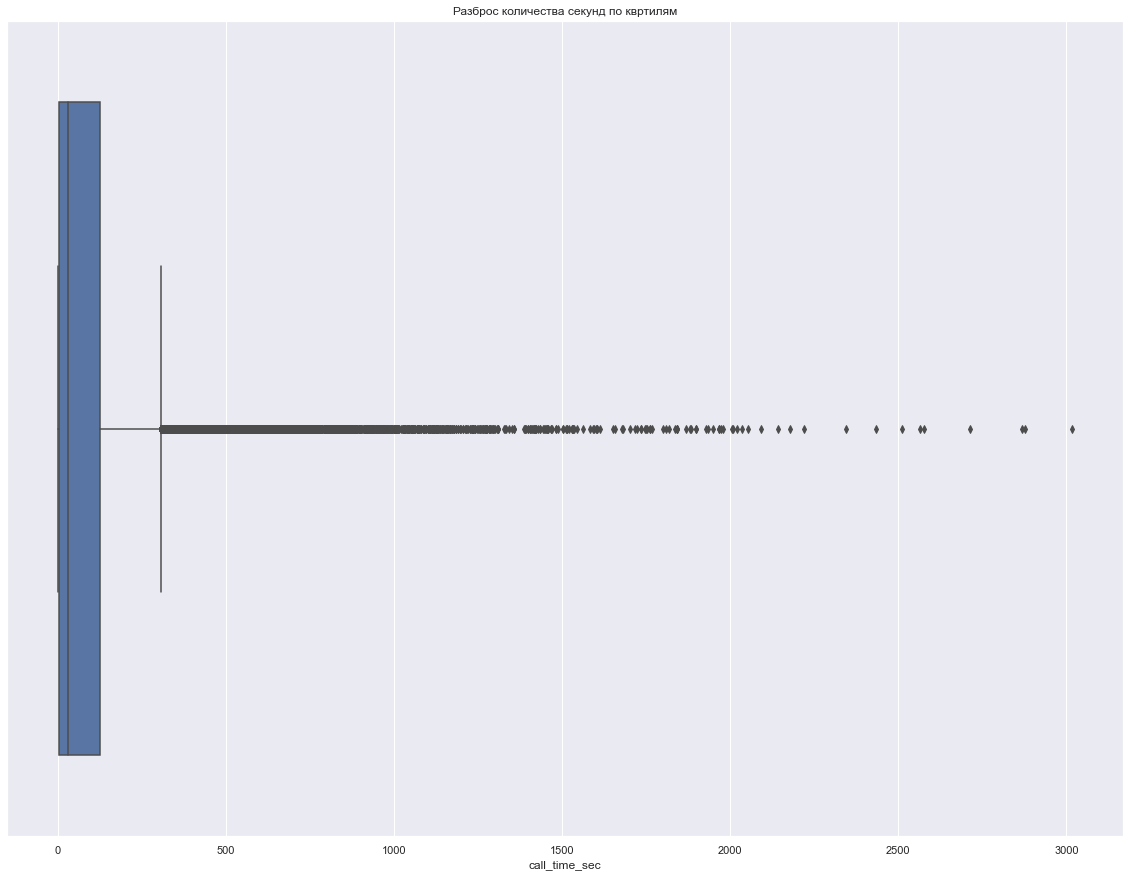

In [457]:
# посмотрим как распределны показатели длины звонка
plt.figure(figsize=(20,15))
ax=sns.boxplot(df_final_merge.call_time_sec)
ax.set_title("Разброс количества секунд по квртилям")

### В целом звонок не должен длияться долго, но можем предположить, что некоторые звонки дляться до часа. примем максимальное значение как выброс.

In [404]:
df_final_merge = df_final_merge[df_final_merge.call_time_sec < 4000]

# Задание 2

## Задание 2.1 
## Создание общей вороднки продаж по базам данных

In [406]:
#определяем кол-во баз данных
df_final_merge.base_translation.value_counts()

База 1    37434
База 4     2163
Name: base_translation, dtype: int64

In [407]:
# Разбиваем общую базу данных на 2 базы: База 1 и База 4

df_base_1 = df_final_merge[df_final_merge["base_translation"] == "База 1"]

df_base_4 = df_final_merge[df_final_merge["base_translation"] == "База 4"]

### Расчитываем показатели для воронки продаж для Базы 1

In [408]:
 # для тех кто дозовнился  
df_b1_1 = df_base_1[df_base_1.call_result_translation.str.contains("Дозвон")].reset_index(drop=True)    
cnt_b1_1 = df_b1_1.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились: {cnt_b1_1}')

#кто дозвонился и не получил отказ
df_b1_2 = df_b1_1[~df_b1_1.call_result_translation.str.contains("Отказ")].reset_index(drop=True) 
cnt_b1_2 = df_b1_2.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились и не отказали: {cnt_b1_2}')

#кто дозвонился и продал продукт
df_b1_3 = df_b1_2[df_b1_2.call_result_translation.str.contains("Успешно")].reset_index(drop=True)
cnt_b1_3 = df_b1_3.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились и продали: {cnt_b1_3}')

Кол-во клеинтов к которым дозвонились: 17896
Кол-во клеинтов к которым дозвонились и не отказали: 11313
Кол-во клеинтов к которым дозвонились и продали: 5559


In [409]:
# проверяем есть ли клиенты, которые повторно делали покупку
df_b1_3.task_id.value_counts(ascending =True)

843083337    1
912437232    1
912429222    1
912426384    1
912408973    1
            ..
889865611    1
889862266    1
889849478    1
889942164    1
933065058    1
Name: task_id, Length: 5559, dtype: int64

### Расчитываем показатели для воронки продаж для Базы 1

In [410]:
 # для тех кто дозовнился  
df_b4_1 = df_base_4[df_base_4.call_result_translation.str.contains("Дозвон")].reset_index(drop=True)    
cnt_b4_1 = df_b4_1.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились: {cnt_b4_1}')

#кто дозвонился и не получил отказ
df_b4_2 = df_b4_1[~df_b4_1.call_result_translation.str.contains("Отказ")].reset_index(drop=True) 
cnt_b4_2 = df_b4_2.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились и не отказали: {cnt_b4_2}')

#кто дозвонился и продал продукт
df_b4_3 = df_b4_2[df_b4_2.call_result_translation.str.contains("Успешно")].reset_index(drop=True)
cnt_b4_3 = df_b4_3.task_id.nunique()
print(f'Кол-во клеинтов к которым дозвонились и продали: {cnt_b4_3}')

Кол-во клеинтов к которым дозвонились: 910
Кол-во клеинтов к которым дозвонились и не отказали: 678
Кол-во клеинтов к которым дозвонились и продали: 451


In [411]:
# проверяем есть ли клиенты, которые повторно делали покупку
df_b4_3.task_id.value_counts(ascending =True)

869211882    1
884648160    1
884588246    1
884524170    1
884513084    1
            ..
878224927    1
878206584    1
878204100    1
877675231    1
931822370    1
Name: task_id, Length: 451, dtype: int64

### Создаем исходные данные для построение воронки продаж

In [412]:
qnt_list = [cnt_b1_1,cnt_b1_2,cnt_b1_3,cnt_b4_1,cnt_b4_2,cnt_b4_3]
calls_list = ["Звонки","Звонок + заинтересованность", "Звоно + продажа"]
base_list = ["База 1","База 4"]

In [413]:
import matplotlib.pyplot as plt
import plotly.express as px

In [414]:
data = dict(Quantity=qnt_list,
    
            Stage=["Звонки","Звонок + заинтересованность", "Звонок + продажа"]*2,
    
            База=["База 1"]*3 + ["База 4"]*3)
    
fig = px.funnel(data, y='Stage', x='Quantity', color='База',
                color_discrete_map={"База 1": "#c4c425", 
                                    "База 4": "#617588"},
                template="simple_white",
                title='Воронка продаж',
                labels={"Stage": "Этапы"},
                opacity = 0.8)
    
fig.show()

## Задание 2.2

In [472]:
# находим сколько каждый сотрудник совершил звонков 
df_calls_agname = df_final_merge.groupby('agent_name')['call_id'].count()
df_calls_agname

agent_name
aashapovalov64931     549
afgluxov              263
amshevchenko           18
arxackevich           529
asmirov               369
                     ... 
yuapodorueva            5
yugdulova             210
yuktixonova           240
yuvbabina             139
zadenis              1997
Name: call_id, Length: 106, dtype: int64

<AxesSubplot:title={'center':'Топ 15 сотрудников по звонкам'}, xlabel='agent_name'>

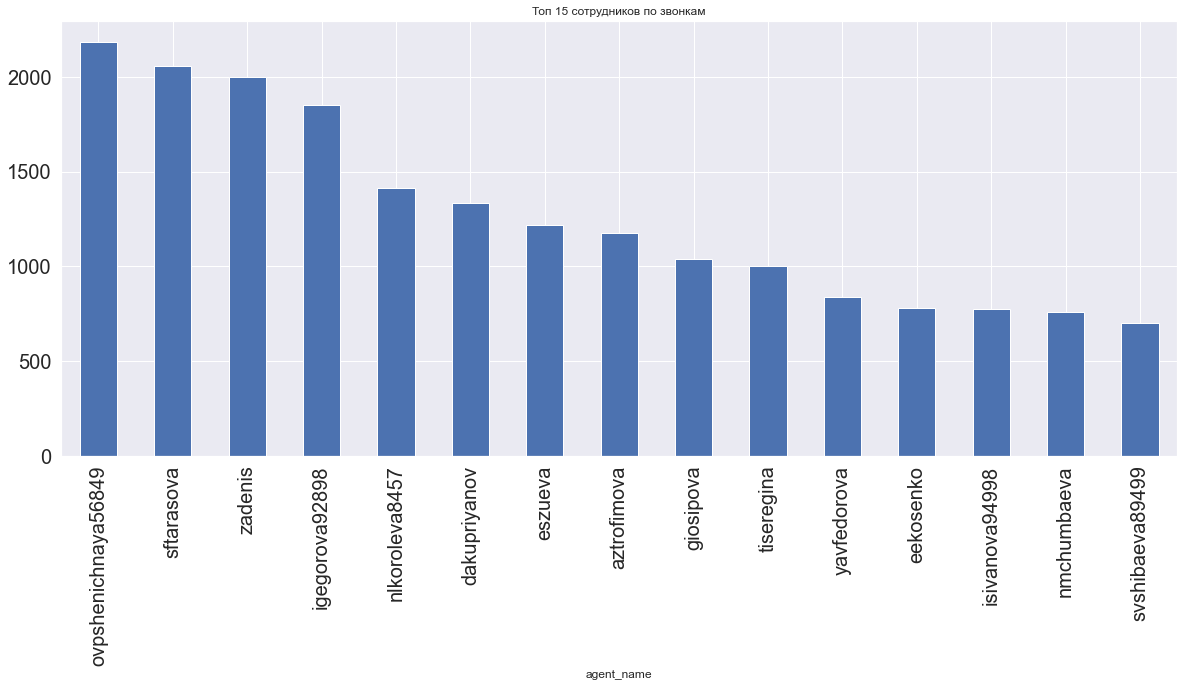

In [473]:
# Гистограмма количества звонков
df_calls_agname.sort_values(ascending = False).head(15).plot(kind='bar',figsize=(20,8),fontsize=20,
                                                             title='Топ 15 сотрудников по звонкам')

In [474]:
# находим среднюю продолжительность разговоря для каждого сотрудника
df_meantime_agname = df_final_merge.groupby('agent_name')['call_time_sec'].mean()
df_meantime_agname

agent_name
aashapovalov64931    100.147541
afgluxov             137.117871
amshevchenko         206.555556
arxackevich          140.096408
asmirov              138.783198
                        ...    
yuapodorueva          40.000000
yugdulova            142.895238
yuktixonova           74.633333
yuvbabina            130.366906
zadenis               90.095643
Name: call_time_sec, Length: 106, dtype: float64

<AxesSubplot:title={'center':'Топ 15 сотрудников по среднему продолжительностью звонка'}, xlabel='agent_name'>

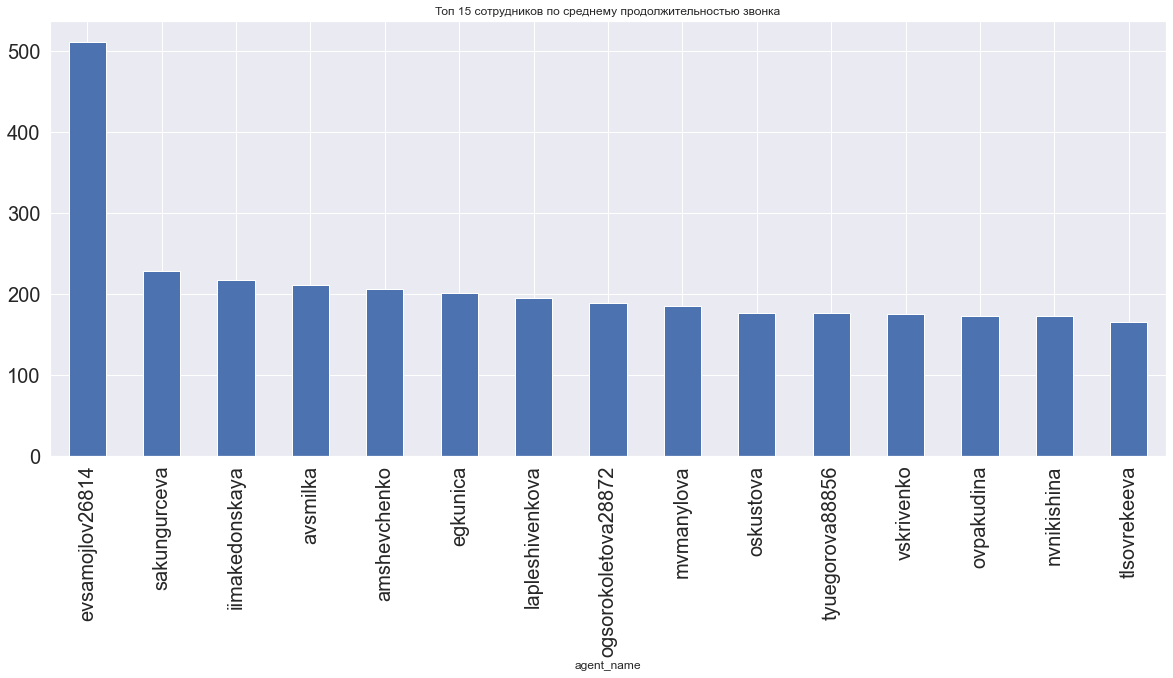

In [475]:
# отображаем гистограмму топ 15 сотрдников по кол-ву 
df_meantime_agname.sort_values(ascending = False).head(15).plot(kind='bar',figsize=(20,8),fontsize=20,
                                                               title='Топ 15 сотрудников по среднему продолжительностью звонка')

In [476]:
data_1 = df_final_merge[df_final_merge['call_result_translation'] == 'Дозвон, Успешно'].groupby(
    'agent_name')["call_result_translation"].count()

In [477]:
data_2 = df_final_merge[(df_final_merge['call_result_translation'] == 'Дозвон, Успешно') |
               (df_final_merge['call_result_translation'] == 'Дозвон, Отказ')].groupby(
                'agent_name')["call_result_translation"].count()

<AxesSubplot:title={'center':'Топ 15 сотрудников по конверсии'}, xlabel='agent_name'>

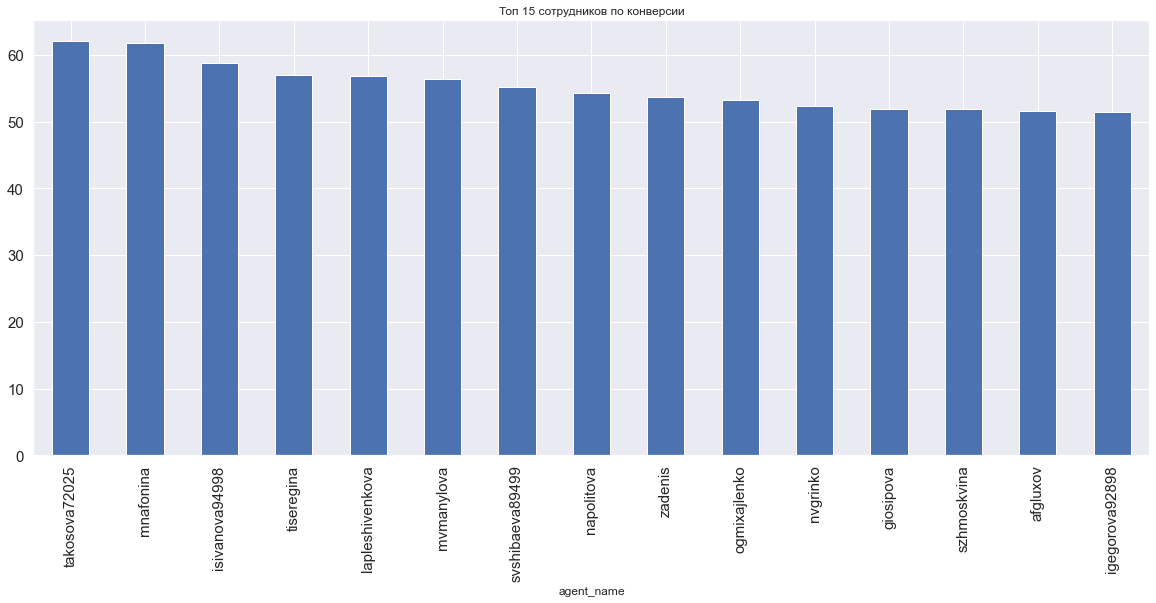

In [478]:
(data_1/data_2*100).sort_values(ascending = False).head(15).plot(kind='bar',figsize=(20,8),fontsize=15,
                                                                title='Топ 15 сотрудников по конверсии')

In [479]:
# создаем датафрейм с конверсией звонков
a = (data_1/data_2*100).sort_values(ascending = False).reset_index()

In [480]:
# создаем датафрейм количества звонков и средней  продолжительностью
m = pd.concat([df_calls_agname,df_meantime_agname],axis=1).reset_index()

In [481]:
# объеденяем метотдом right т.к. наиболее важный параметр это конверсия
df_analyze = m.merge(a,how="right").set_index('agent_name')

In [482]:
df_analyze.columns=['num_calls','mean_call_duration','call_conversion']

### Можно предположить, что длина звонка может повлиять на конверсию

<AxesSubplot:xlabel='call_conversion'>

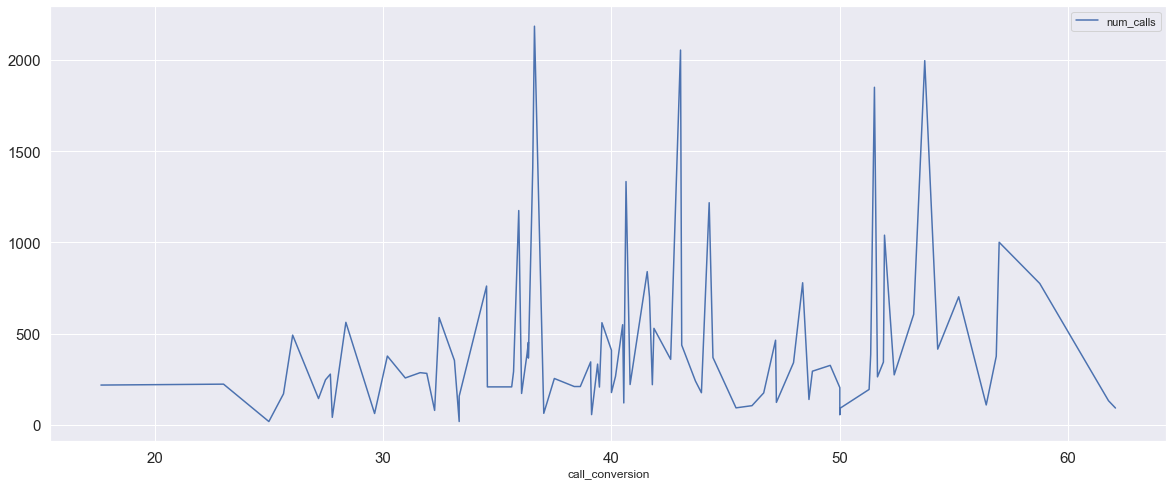

In [483]:
df_analyze.iloc[::,[0,2]].set_index('call_conversion').plot(figsize=(20,8),fontsize=15)

### График видет себя хаотично с увеличением конверсии поэто прямой зависимости мы не замечаем

In [484]:
# Построим интерективные графики распределния
fig = px.scatter(df_analyze, x="call_conversion", y="num_calls", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

### Количество звонков предсказуемо не сильно влияют на конверсию

In [485]:
fig = px.scatter(df_analyze, x="call_conversion", y="mean_call_duration", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

### Среднее продолжительность не сильно влияет на конверсию.
### Из проделанного анализа можно сделать вывод что около трети всех звонков переходят в продажу, что видно из воронки продаж, в базе 4 почти половина.

In [486]:
print(f'Средняя конверсия по всем сотрудникам: {df_analyze.call_conversion.mean():.1f}')

Средняя конверсия по всем сотрудникам: 41.2


In [492]:
df_final_merge

,task_id,call_id,agent_name,call_dt,call_result_id,call_result_translation,call_time_sec,hid,finish_dt_task,base_id,task_result_id,task_result_translation,base_translation,product_type_cd,approve_dt,reject_dt,using_dt
0,843083337,6645916908#16711160876,sakungurceva,2020-03-01,6,"Дозвон, Отложить",298,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
1,843083337,6750206063#16711160876,sakungurceva,2020-03-17,6,"Дозвон, Отложить",9,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
2,843083337,6769109629#16711160876,sakungurceva,2020-03-24,6,"Дозвон, Отложить",111,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
3,843083337,6890964670#16711160876,sakungurceva,2020-04-15,5,Недозвон,7,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
4,843083337,6926247810#16711160876,lapleshivenkova,2020-04-15,3,"Дозвон, Успешно",1329,36d2f49fc49f572677416d54536a41c6,2020-04-15,7553,6,Успешно,База 1,INV,NaT,2020-04-22,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39593,933035272,7124347282#18483260522,aztrofimova,2020-05-30,5,Недозвон,0,9a2d6dd8ff0a11bdc7a65c8ded5d6d92,2020-05-30,7553,1,Дубль,База 1,NaN,NaT,NaT,NaT
39594,933040837,7123998330#18480990905,aztrofimova,2020-05-30,5,Недозвон,9,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39595,933040837,7124519269#18480990905,zadenis,2020-05-30,1,"Дозвон, Отказ",41,3c682df2f35ed1dc634501b4b7ae25fe,2020-05-30,7554,5,Отказ,База 4,NaN,NaT,NaT,NaT
39596,933042718,7124237815#18482537123,npmoskalenko,2020-05-30,1,"Дозвон, Отказ",138,d6262e2d5840a2e68fcf028c9732606c,2020-05-30,7553,5,Отказ,База 1,NaN,NaT,NaT,NaT


In [498]:
df_final_merge.groupby(['call_dt','agent_name'])['call_time_sec'].count()

call_dt     agent_name         
2020-03-01  sakungurceva            1
2020-03-03  nvgrinko                1
            ogmixajlenko            1
            sakungurceva            1
2020-03-04  evsamojlov26814         1
                                   ..
2020-05-30  ogmixajlenko            8
            ovpshenichnaya56849    38
            sftarasova             58
            tiseregina              8
            zadenis                48
Name: call_time_sec, Length: 1826, dtype: int64